<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Clustering Lab
_Author: Jeff Hale_

In this lab you will practice clustering countries with K-means and DBSCAN. Remember, clustering is an unsupervised learning method so known classes aren't something you'll generally have. 

#### Imports

In [24]:
import plotly.express as px
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


#### Read in the gapminder data

In [2]:
gapminder = px.data.gapminder() 

#### Inspect

In [3]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [4]:
gapminder.isna().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [5]:
gapminder.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


#### Filter the data so that you only have the rows from the most recent year

In [6]:
gapminder['year'].value_counts()

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

In [7]:
data = gapminder[gapminder['year'] == 2007]

#### Set the country column as the index

In [8]:
data.set_index('country', inplace=True)

#### Drop the columns that make sense to drop for clustering

In [9]:
# ... .drop(columns=['year', 'iso_alpha', 'iso_num'])
data = data.drop(columns=['year', 'iso_alpha', 'iso_num'])

#### One-Hot Encode the columns that it makes sense to encode

In [10]:
data.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.828,31889923,974.580338
Albania,Europe,76.423,3600523,5937.029526
Algeria,Africa,72.301,33333216,6223.367465
Angola,Africa,42.731,12420476,4797.231267
Argentina,Americas,75.320,40301927,12779.379640


In [11]:
data = pd.get_dummies(data)

In [12]:
data.head(2)

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,,
Afghanistan,43.828,31889923,974.580338,0,0,1,0,0
Albania,76.423,3600523,5937.029526,0,0,0,1,0


#### Scale your features

In [13]:
data_scaled = StandardScaler().fit_transform(data)

In [14]:
data_scaled[0]

array([-1.92673191, -0.08246934, -0.8354152 , -0.76011695, -0.46225016,
        1.81742408, -0.51754917, -0.11952286])

#### Cluster with KMeans

In [15]:
kmeans = KMeans()
kmeans.fit(data_scaled)

KMeans()

#### How many clusters do you have?

In [16]:
kmeans.n_clusters

8

#### Check out the labels

In [17]:
kmeans.labels_

array([6, 2, 7, 1, 3, 4, 2, 0, 6, 2, 1, 3, 2, 1, 3, 2, 1, 1, 6, 1, 3, 1,
       1, 3, 5, 3, 7, 1, 1, 3, 1, 2, 3, 2, 2, 1, 3, 3, 7, 3, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 3, 1, 1, 3, 3, 0, 2, 2, 5, 6, 6, 6, 2, 0, 2, 3,
       0, 6, 1, 6, 0, 0, 6, 1, 1, 7, 1, 1, 6, 1, 7, 7, 3, 6, 2, 7, 1, 6,
       1, 6, 2, 4, 3, 1, 1, 2, 0, 6, 3, 3, 3, 6, 2, 2, 3, 7, 2, 1, 7, 0,
       7, 2, 1, 0, 2, 2, 1, 1, 2, 6, 1, 1, 2, 2, 6, 0, 1, 6, 1, 3, 7, 2,
       1, 2, 3, 3, 3, 6, 6, 6, 1, 1], dtype=int32)

#### Make a copy of the X DataFrame and add your labels to it

In [18]:
data_copy = data
data_copy['cluster'] = kmeans.labels_

In [19]:
data_copy.head(2)

,lifeExp,pop,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,cluster
country,,,,,,,,,
Afghanistan,43.828,31889923,974.580338,0,0,1,0,0,6
Albania,76.423,3600523,5937.029526,0,0,0,1,0,2


#### Explore your clusters with groupbys, pairplots/scatterplots

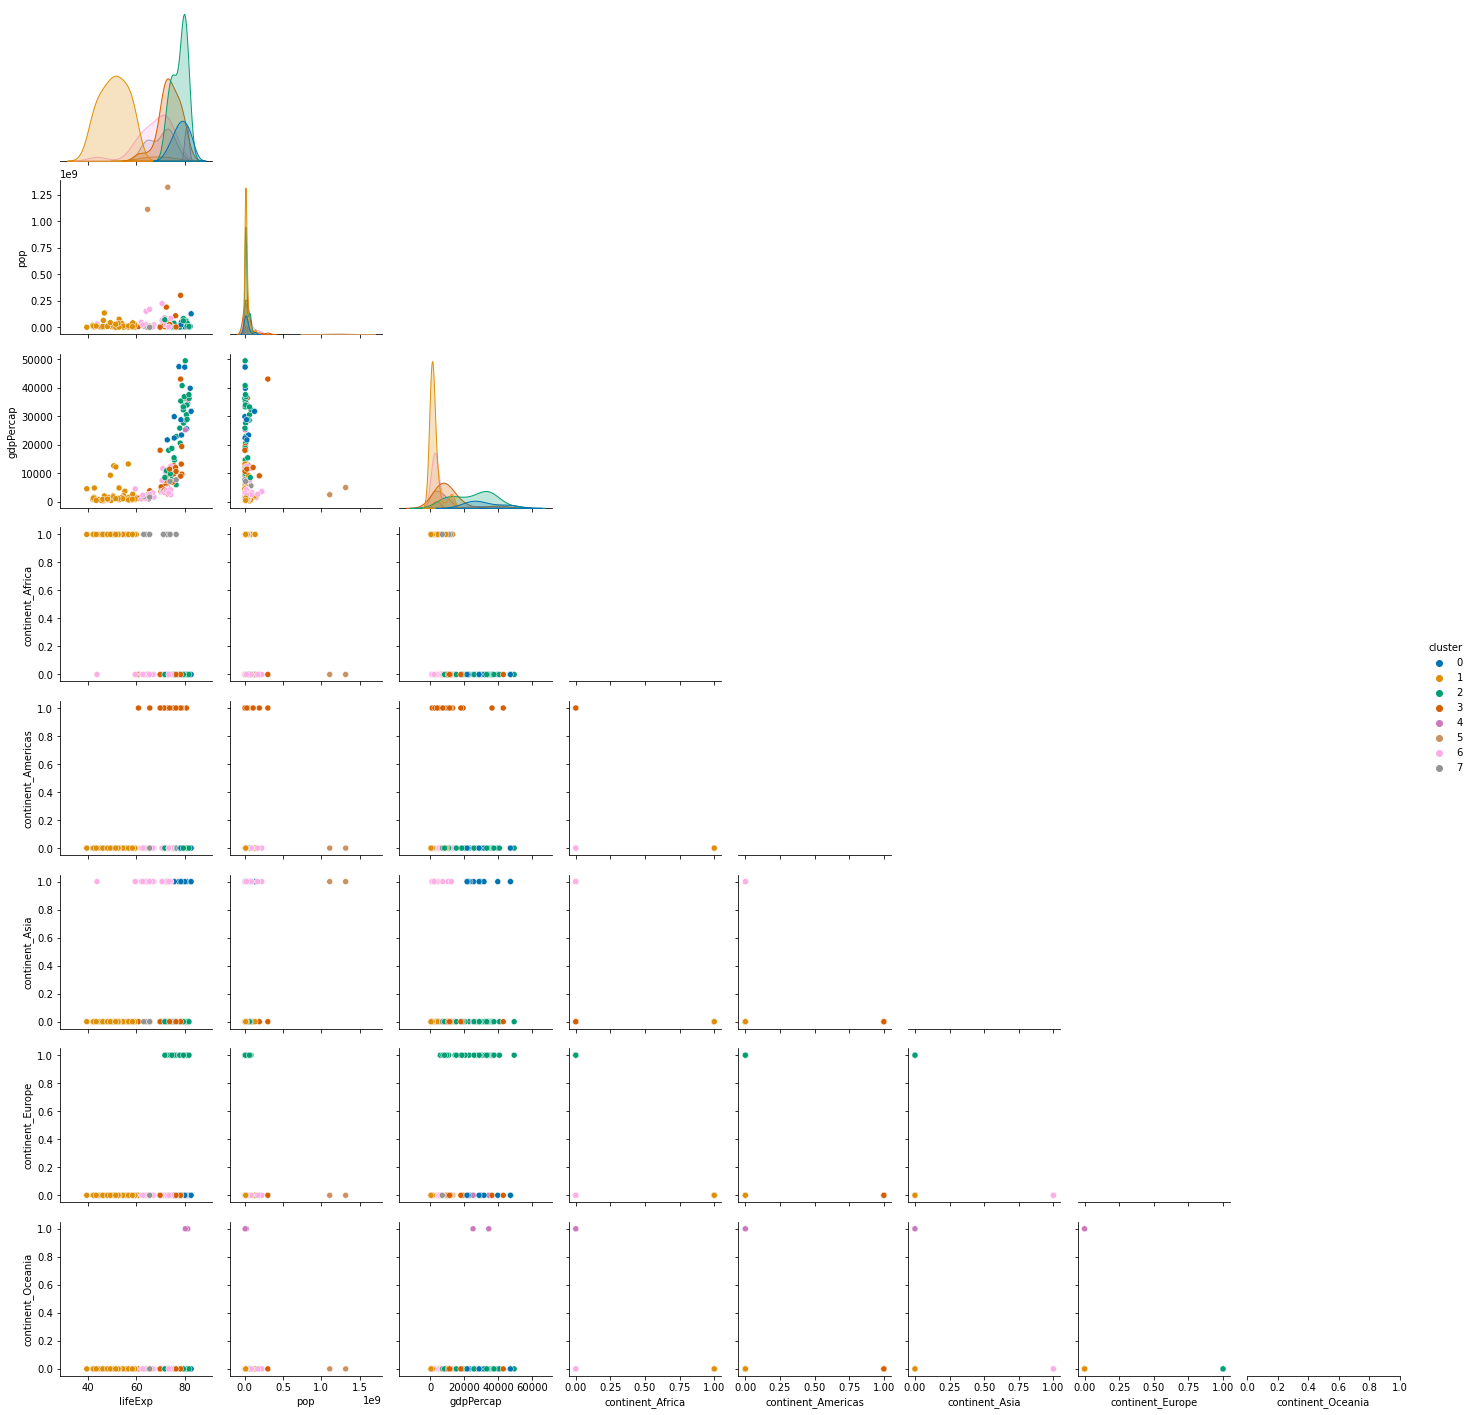

In [23]:
sns.pairplot(data_copy, corner=True, palette='colorblind', hue='cluster')
;

#### Evaluate on silhouette score

In [25]:
silhouette_score(data_scaled, kmeans.labels_)

0.6176983255576001

#### What's the best number of clusters according to the silhouette score?

Try several numbers of clusters.

#### Make an elbow plot of the silhouette score

## Part 2: DBSCAN

Use DBSCAN to cluster

#### Explore and visualize your results

#### Hyperparameter tune 

#### Which algorithm with which hyperparameters would you use to cluster a new country? Why?

## Bonus ⭐️

Use Agglomerative Clustering or another a clustering algorithm. Scikit-learn has a guide to its clustering algorithms [here](https://scikit-learn.org/stable/modules/clustering.html).